In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string # special operations on strings

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [3]:
#Download necessary NLTK data files
nltk.download('punkt')
nltk.download('stopwords')

# Define stop words
stop_words = stopwords.words('english')

# Initialize the Porter Stemmer
ps = PorterStemmer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASHISH\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASHISH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
df = pd.read_csv("blogs.csv",on_bad_lines='skip')

In [5]:
df

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [6]:
# Check the distribution of categories
print(df['Labels'].value_counts())

# Check the length of the text data
df['Text_Length'] = df['Data'].apply(len)
print(df['Text_Length'].describe())


Labels
alt.atheism                 100
comp.graphics               100
talk.politics.misc          100
talk.politics.mideast       100
talk.politics.guns          100
soc.religion.christian      100
sci.space                   100
sci.med                     100
sci.electronics             100
sci.crypt                   100
rec.sport.hockey            100
rec.sport.baseball          100
rec.motorcycles             100
rec.autos                   100
misc.forsale                100
comp.windows.x              100
comp.sys.mac.hardware       100
comp.sys.ibm.pc.hardware    100
comp.os.ms-windows.misc     100
talk.religion.misc          100
Name: count, dtype: int64
count     2000.000000
mean      2324.978000
std       3590.560226
min        425.000000
25%       1147.000000
50%       1605.500000
75%       2374.500000
max      62290.000000
Name: Text_Length, dtype: float64


In [7]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download stopwords if you haven't already
nltk.download('stopwords')
nltk.download('punkt')

# Define a function to clean and tokenize text
def preprocess_text(text):
    # Remove punctuation and numbers
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

# Apply preprocessing
df['Cleaned_Text'] = df['Data'].apply(preprocess_text)

# Display the cleaned text
print(df[['Data', 'Cleaned_Text']].head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASHISH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASHISH\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                                Data  \
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....   
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...   
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...   

                                        Cleaned_Text  
0  path cantaloupesrvcscmuedumagnesiumclubcccmued...  
1  newsgroups altatheism path cantaloupesrvcscmue...  
2  path cantaloupesrvcscmuedudasnewsharvardedunoc...  
3  path cantaloupesrvcscmuedumagnesiumclubcccmued...  
4  xref cantaloupesrvcscmuedu altatheism talkreli...  


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the cleaned text data
X = tfidf_vectorizer.fit_transform(df['Cleaned_Text'])

# Display the shape of the TF-IDF matrix
print(X.shape)


(2000, 46293)


In [9]:
from sklearn.model_selection import train_test_split

# Define the features and the target variable
X = tfidf_vectorizer.transform(df['Cleaned_Text'])  # TF-IDF features
y = df['Labels']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the split data
print(X_train.shape, X_test.shape)


(1600, 46293) (400, 46293)


In [10]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the model on the training data
nb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = nb_classifier.predict(X_test)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))


Accuracy: 0.8425
Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.55      0.94      0.69        18
           comp.graphics       0.80      0.89      0.84        18
 comp.os.ms-windows.misc       0.95      0.91      0.93        22
comp.sys.ibm.pc.hardware       0.91      0.80      0.85        25
   comp.sys.mac.hardware       0.79      0.90      0.84        21
          comp.windows.x       1.00      0.84      0.91        25
            misc.forsale       1.00      0.67      0.80        18
               rec.autos       0.89      0.94      0.92        18
         rec.motorcycles       0.88      0.88      0.88        16
      rec.sport.baseball       0.83      0.83      0.83        18
        rec.sport.hockey       0.83      1.00      0.91        15
               sci.crypt       0.83      1.00      0.90        19
         sci.electronics       0.70      0.88      0.78        16
                 sci.med       0.8

In [11]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Define a function to get the sentiment score
def get_sentiment(text):
    scores = sid.polarity_scores(text)
    if scores['compound'] >= 0.05:
        return 'positive'
    elif scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis to the blog posts
df['Sentiment'] = df['Data'].apply(get_sentiment)

# Display the sentiment results
print(df[['Data', 'Sentiment']].head())


                                                Data Sentiment
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  negative
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  positive
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  negative
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  negative
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  positive


Sentiment                 negative  neutral  positive
Labels                                               
alt.atheism                   42.0      1.0      57.0
comp.graphics                 13.0      4.0      83.0
comp.os.ms-windows.misc       24.0      2.0      74.0
comp.sys.ibm.pc.hardware      21.0      0.0      79.0
comp.sys.mac.hardware         24.0      3.0      73.0
comp.windows.x                20.0      2.0      78.0
misc.forsale                   7.0      8.0      85.0
rec.autos                     27.0      1.0      72.0
rec.motorcycles               30.0      2.0      68.0
rec.sport.baseball            27.0      1.0      72.0
rec.sport.hockey              28.0      1.0      71.0
sci.crypt                     29.0      0.0      71.0
sci.electronics               18.0      4.0      78.0
sci.med                       38.0      1.0      61.0
sci.space                     32.0      3.0      65.0
soc.religion.christian        29.0      0.0      71.0
talk.politics.guns          

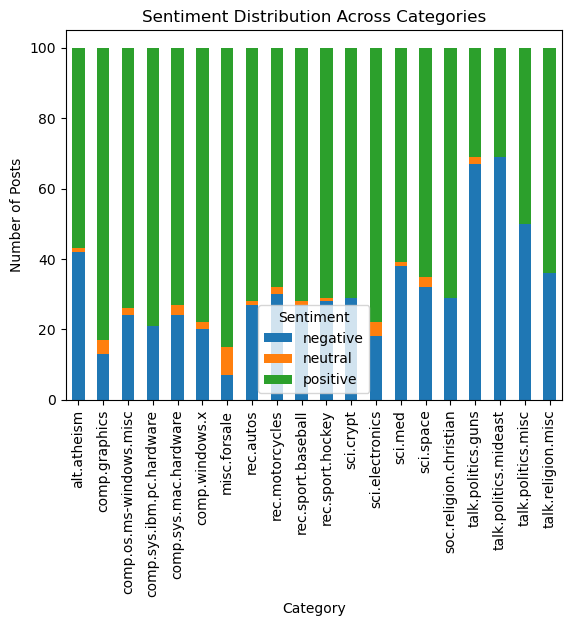

In [12]:
# Check the distribution of sentiments across different categories
sentiment_distribution = df.groupby('Labels')['Sentiment'].value_counts().unstack().fillna(0)
print(sentiment_distribution)

# Plot the distribution if desired
import matplotlib.pyplot as plt

sentiment_distribution.plot(kind='bar', stacked=True)
plt.title('Sentiment Distribution Across Categories')
plt.xlabel('Category')
plt.ylabel('Number of Posts')
plt.show()


In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)


Accuracy: 0.8425
Precision: 0.8616118547040051
Recall: 0.8425
F1 Score: 0.8319911099483106


#### Analysis

##### Overall Sentiment Trends:

* Positive Sentiment Dominance: Categories like comp.graphics, misc.forsale, and sci.electronics have a significant number of positive sentiments. This suggests that blog posts in these categories tend to be more positive in tone.
Negative Sentiment Trends: Categories such as talk.politics.guns and talk.politics.mideast have a high number of negative sentiments. This indicates that blog posts related to these topics often convey more negative sentiments.

##### Categories with Balanced Sentiments:

* The talk.politics.misc category shows a balanced sentiment distribution with an equal number of positive and negative sentiments, suggesting a mixed tone in posts related to this category.
The talk.religion.misc category has a higher count of positive sentiments compared to negative, indicating a more positive tone.

##### Neutral Sentiment Observations:

* Categories like alt.atheism and comp.sys.ibm.pc.hardware have very few neutral sentiments, indicating that blog posts in these categories are either clearly positive or negative.
Potential Insights:

* The distribution of sentiments can offer insights into the nature of discussions within these categories. For example, categories with high negative sentiment may be more contentious or controversial.

##### Conclusion
* This sentiment analysis reveals distinct patterns in how sentiments are distributed across various categories of blog posts. Understanding these trends can provide deeper insights into the nature of discussions and opinions within different topics.